# Introduction

This project sets out to analyze the affects that Covid-19 had on the Taxi industry in New York City, New York.

Covid-19 had tremendous impact on every aspect of society and much of the restrictions that were put into place directly impacted the way Taxis could operate.

### Background Information
The Covid-19 pandemic began on March 11th of 2020 and continued for a substantial portion of the next 3 years. For the first year lockdowns, mask restrictions, limiting the number of people in places, and other limitations were placed on the United States. These restrictions would seem to have a logical impact on the NYC Taxi market but how sever was that impact? [(Here is a link to the CDC's timeline)](https://www.cdc.gov/museum/timeline/covid19.html)

*This project will attempt to answer the following questions:*

* Did the average passenger count go up or down during the pandemic compared to years before 2020.
* Did the payment method for rides change during and after the pandemic?
* How was the average fare cost per ride affected?
* How did the pandemic affect the average trip distance?
* Was tipping affected by the pandemic?


## Methodology

Taxi data was taken from the [(NYC Taxi & Limousine Commission)](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page) and the Covid data was taken from the [(CDC)](https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36). For definitions of terms in the Taxi data, please see the `data_dictionary_trip_records_yellow.pdf` in the assets folder.

The Taxi data exists originally in .parquet files that contain a month's worth of trip data. This was compiled into two .csv files, `overall_data.csv` and `sample.csv`. The `overall_data.csv` file is what was used in the analysis below. It was not uploaded here due to its size and GitHub's size restrictions. `sample.csv` has been provided within the assets folder. This is a much smaller data set compiled from the same .parquet files but in a more manageable size for this to be ran for testing purposes and by others. If you would like to run this on a full data set like `overall_data.csv`, you will need to gather the .parquet files from the NYC link above and run `taxi_csv_create.ipynb`. 


## Results

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import folium as fol

### 2. Import and clean the Taxi and Covid Data

In [2]:
overall_data = pd.read_csv('assets/overall_data.csv')

In [3]:
overall_data["pickup_datetime"] = pd.to_datetime(overall_data['pickup_datetime'])
overall_data['dropoff_datetime'] = pd.to_datetime(overall_data['dropoff_datetime'])

Inaccurate trip data needs to be removed from the dataframe

In [4]:
drop_list = (list(np.where(overall_data['trip_distance'] > 100)))

In [5]:
for i in drop_list:
    overall_data.drop(i, inplace=True)

In [6]:
covid_df  = pd.read_csv('assets/covidreportsbystate.csv')

In [7]:
covid_df['submission_date'] = pd.to_datetime(covid_df['submission_date'])
covid_df['created_at'] = pd.to_datetime(covid_df['created_at'])

In [8]:
covid_df.drop(columns=['consent_cases', 'consent_deaths', 'prob_cases', 'new_case', 'pnew_case', 'prob_death', 'new_death', 'pnew_death', 'conf_cases', 'conf_death'], inplace=True)

In [9]:
covid_df['year'] = covid_df['submission_date'].dt.year

### 3. Explore the Data

#### Question 1: Did the average passenger count go up or down during the pandemic compared to years before 2020.

##### Plot 1: Average Passenger Count by Year

(1.5619788664423502, 1.4131742401809508, 1.7074363829092194)

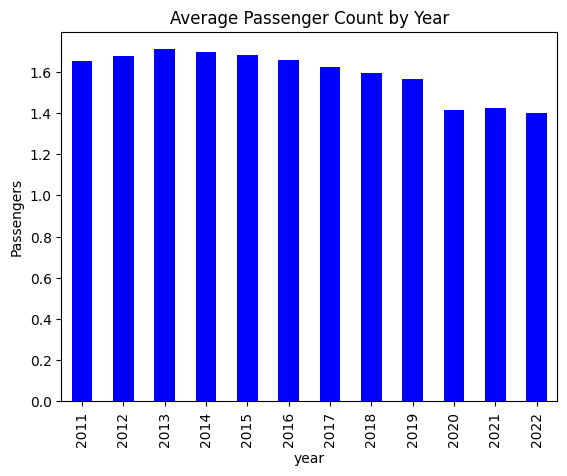

In [10]:

passenger_count = overall_data.groupby('year')['passenger_count'].mean()
passenger_count.plot(kind='bar', ylabel="Passengers", title='Average Passenger Count by Year', color='blue')


passenger_count_2019 = overall_data[overall_data['year'] == 2019]['passenger_count'].mean()
passenger_count_2020 = overall_data[overall_data['year'] == 2020]['passenger_count'].mean()
passenger_count_2013 = overall_data[overall_data['year'] == 2013]['passenger_count'].mean()

passenger_count_2019, passenger_count_2020, passenger_count_2013

##### Plot 2: Total Covid Cases in NY

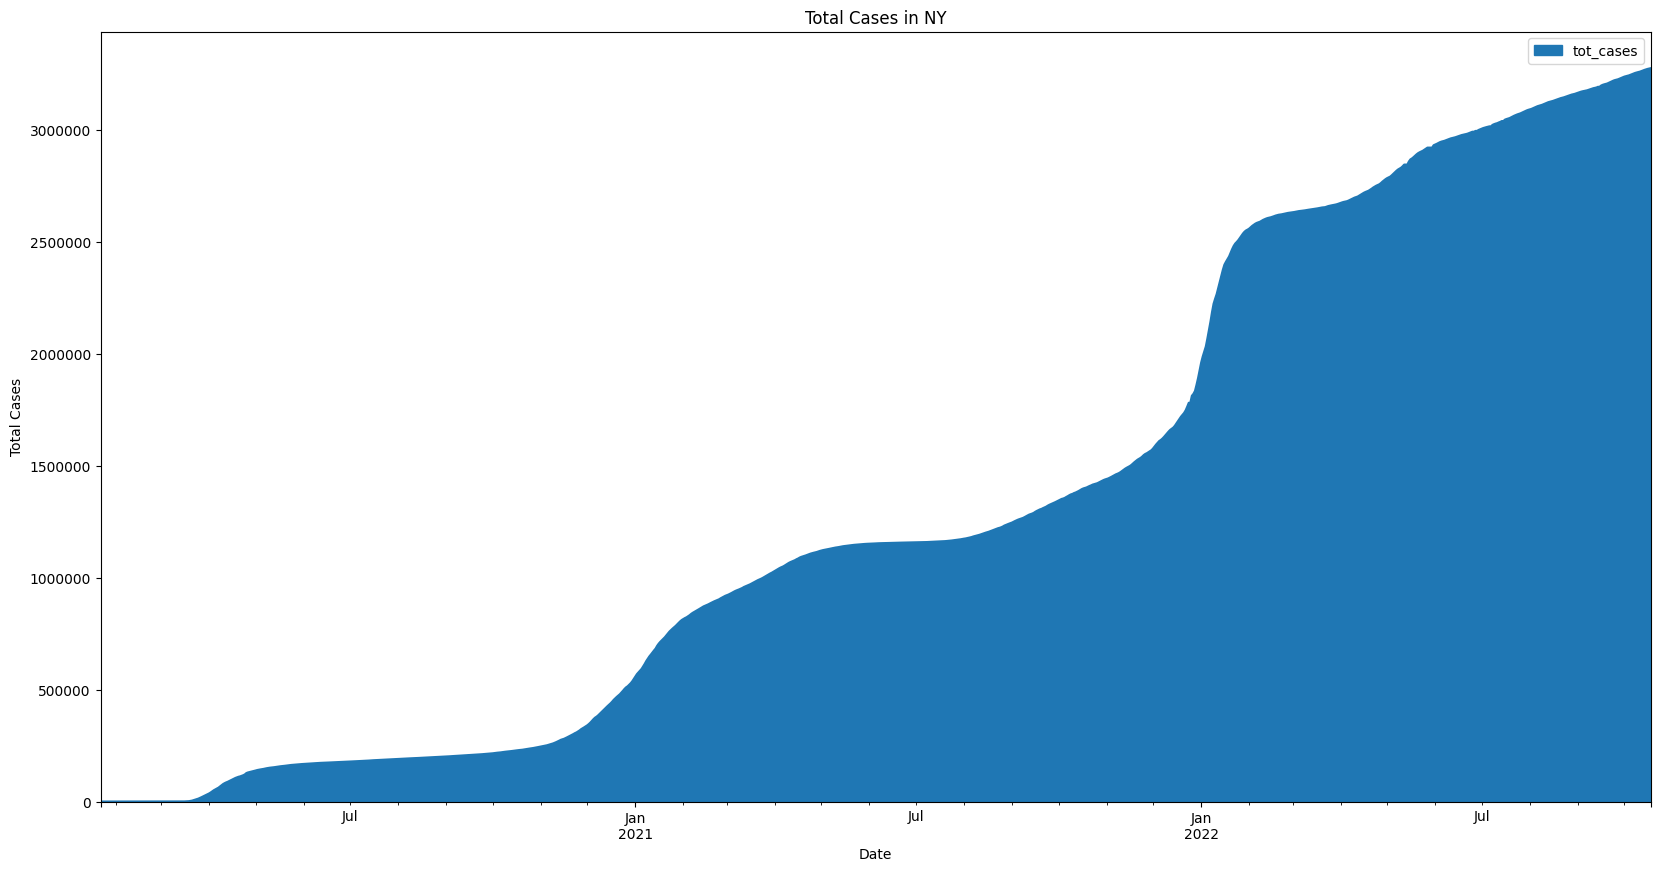

In [11]:

covid_df[covid_df['state'] == 'NY'].plot(kind='area',x='submission_date', y='tot_cases', title='Total Cases in NY', xlabel='Date', ylabel='Total Cases', figsize=(20, 10)).ticklabel_format(style='plain', axis='y')

### Findings

* The average number of passengers had already began to decline starting in 2013 but took a steeper drop from 1.56 people in 2019 to 1.41 people in 2020.
* Rides did recover a bit in 2021 but went back down in 2022.
* The pandemic had an impact on the average rider count but not as significant as hypothesized at the outset.

#### Question 2: Did the payment method for rides change during and after the pandemic?

### Calculate the number of Cash and Credit Card usage totals by year

In [12]:

credit = overall_data[overall_data['payment_type'] == 'credit_card']
credit = credit.groupby('year')['payment_type'].count()



In [13]:

cash = overall_data[overall_data['payment_type'] == 'cash']
cash = cash.groupby('year')['payment_type'].count()



### Calculate the number of Cash and Credit Card usage totals for 2019 and 2020 specifically

In [14]:

cash_2019 = overall_data[(overall_data['payment_type'] == 'cash') & (overall_data['year'] == 2019)]['payment_type'].count()
print(f"{cash_2019} cash payments in 2019")

324686 cash payments in 2019


In [15]:

credit_2019 = overall_data[(overall_data['payment_type'] == 'credit_card') & (overall_data['year'] == 2019)]['payment_type'].count()
print(f"{credit_2019} credit card payments in 2019")

859720 credit card payments in 2019


In [16]:

cash_2020 = overall_data[(overall_data['payment_type'] == 'cash') & (overall_data['year'] == 2020)]['payment_type'].count()
print(f"{cash_2020} cash payments in 2020")

324054 cash payments in 2020


In [17]:

credit_2020 = overall_data[(overall_data['payment_type'] == 'credit_card') & (overall_data['year'] == 2020)]['payment_type'].count()
print(f"{credit_2020} credit card payments in 2020")

783321 credit card payments in 2020


### Calculate the percentage each payment type was used in 2019 and 2020

In [18]:
cash_2019 / (cash_2019 + credit_2019)


0.27413403849693435

In [19]:

credit_2019 / (cash_2019 + credit_2019)


0.7258659615030657

In [20]:

cash_2020 / (cash_2020 + credit_2020)

0.292632577040298

In [21]:

credit_2020 / (cash_2020 + credit_2020)

0.707367422959702

##### Plot 3: Cash vs. Credit Payments

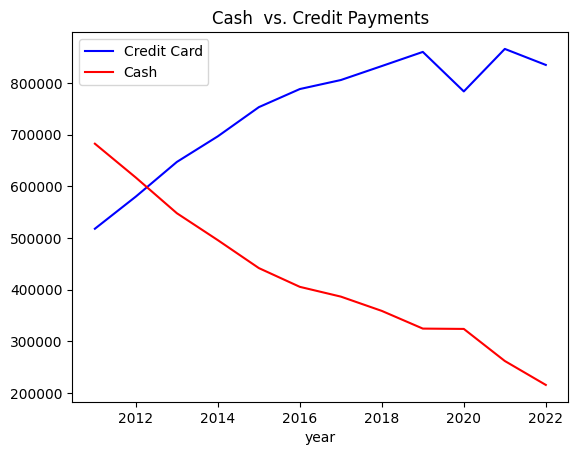

In [22]:

fig, ax = plt.subplots()
credit.plot(title='Credit Card Payments', color='blue', ax=ax)
cash.plot(title='Cash  vs. Credit Payments', color='red', ax=ax)
ax.legend(['Credit Card', 'Cash'])


##### Plot 4: Percentage of Cash vs. Credit Payments for 2019 and 2020

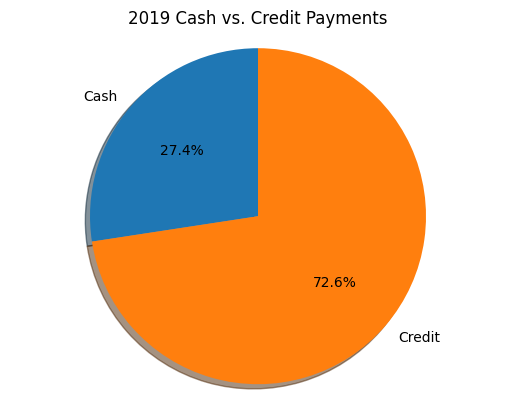

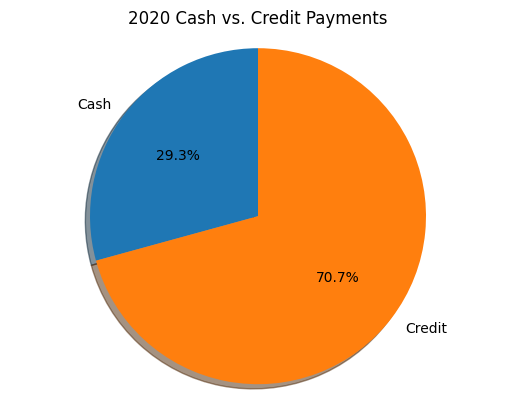

In [23]:
labels = ['Cash', 'Credit']
sizes = [cash_2019 / (cash_2019 + credit_2019), credit_2019 / (cash_2019 + credit_2019)]
sizes2 = [cash_2020 / (cash_2020 + credit_2020), credit_2020 / (cash_2020 + credit_2020)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('2019 Cash vs. Credit Payments')
plt.show()

fig2, ax2 = plt.subplots()
ax2.pie(sizes2, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')
plt.title('2020 Cash vs. Credit Payments')
plt.show()



### Findings

* The number of cash payments in 2019 was 321,343 while the number of credit payments the same year was 851,437
* The number of cash payments in 2020 was 321,204 while the number of credit payments the same year was 777,336
* In 2019, roughly 73% of all payments were made with credit card. In 2020 that number decreased to roughly %71.

#### Question 3: How was the average fare cost per ride affected?

##### Plot 5: Average Fare Amount by Year

<Axes: title={'center': 'Average Fare Amount by Year'}, xlabel='year', ylabel='Fare Amount'>

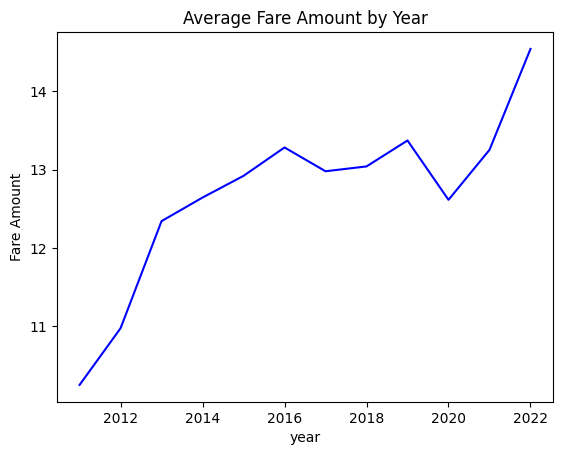

In [24]:

fare_amount = overall_data.groupby('year')['fare_amount'].mean()
fare_amount.plot(title='Average Fare Amount by Year', color='blue', ylabel='Fare Amount')


In [25]:

fare_amount_2011 = overall_data[overall_data['year'] == 2011]['fare_amount'].mean()
print(f"Average fare amount in 2011: ${fare_amount_2011}")

Average fare amount in 2011: $10.250429482975427


In [26]:

fare_amount_2019 = overall_data[overall_data['year'] == 2019]['fare_amount'].mean()
print(f"Average fare amount in 2019: ${fare_amount_2019}")

Average fare amount in 2019: $13.37381559418421


In [27]:

fare_amount_2020 = overall_data[overall_data['year'] == 2020]['fare_amount'].mean()
print(f"Average fare amount in 2020: ${fare_amount_2020}")


Average fare amount in 2020: $12.615536593780787


In [28]:

fare_amount_2021 = overall_data[overall_data['year'] == 2021]['fare_amount'].mean()
print(f"Average fare amount in 2021: ${fare_amount_2021}")


Average fare amount in 2021: $13.253906740674061


##### Plot 6: Average Fare Amount for 2019 through 2022

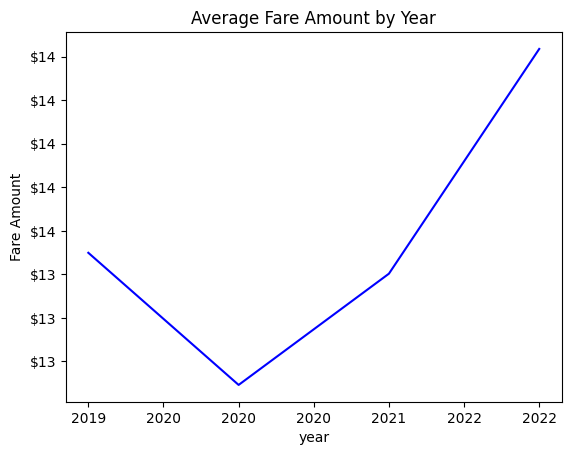

In [29]:

fare_amount = overall_data[overall_data['year'] >= 2019].groupby('year')['fare_amount'].mean()
fare_amount.plot(title='Average Fare Amount by Year', color='blue', ylabel='Fare Amount')
ax = plt.gca()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))



### Findings

* The average fare price per ride has steadily been increasing since 2011.
* The average fare price in 2011 was $10.25 and grew to $13.38 in 2019.
* In 2020 the average fare price was $12.62.

#### Question 4: How did the pandemic affect the average trip distance?

##### Create and clean one last dataset for the NYC Boroughs

In [30]:
borough_data = pd.read_csv('assets/taxi_zone_lookup.csv')


In [31]:

borough_data = borough_data[['LocationID', 'Borough']]
borough_data = borough_data.rename(columns={'LocationID': 'PULocationID'})
overall_data = overall_data.merge(borough_data, on='PULocationID', how='left')
overall_data = overall_data.rename(columns={'Borough': 'PUBorough'})


In [32]:
overall_data = overall_data.loc[overall_data['PUBorough'] != 'EWR']
overall_data = overall_data.loc[overall_data['PUBorough'] != 'Unknown']

In [33]:

map_data = overall_data.set_index('PUBorough')
map_data

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,RateCodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,year,is_covid_rel
PUBorough,,,,,,,,,,,,,,,,,,,
Brooklyn,1,2011-01-14 22:50:03,2011-01-14 23:02:03,3.0,2.10,97,97,1.0,N,cash,7.7,0.5,0.5,0.00,0.0,0.0,8.70,2011,False
Queens,2,2011-01-16 14:44:00,2011-01-16 15:03:00,1.0,4.07,129,129,1.0,NaN,credit_card,13.3,0.0,0.5,2.00,0.0,0.0,15.80,2011,False
Brooklyn,1,2011-01-30 03:32:39,2011-01-30 03:44:16,1.0,2.90,255,34,1.0,N,credit_card,9.7,0.5,0.5,2.14,0.0,0.0,12.84,2011,False
Manhattan,1,2011-01-02 13:49:56,2011-01-02 13:58:02,1.0,1.10,48,237,1.0,N,cash,6.5,0.0,0.5,0.00,0.0,0.0,7.00,2011,False
Queens,2,2011-01-10 21:44:00,2011-01-10 22:18:00,1.0,19.11,132,142,2.0,NaN,credit_card,45.0,0.0,0.5,9.00,4.8,0.0,59.30,2011,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Manhattan,2,2022-11-17 11:37:49,2022-11-17 11:49:55,1.0,1.10,162,230,1.0,N,credit_card,8.5,0.0,0.5,2.36,0.0,0.3,14.16,2022,True
Manhattan,2,2022-11-06 10:20:21,2022-11-06 10:27:46,1.0,2.24,113,230,1.0,N,credit_card,8.5,0.0,0.5,2.36,0.0,0.3,14.16,2022,True
Manhattan,1,2022-11-10 18:57:13,2022-11-10 19:10:09,1.0,1.70,236,161,1.0,N,credit_card,10.0,3.5,0.5,2.85,0.0,0.3,17.15,2022,True


##### Plot 7: Average Trip distance by Borough since 2011 Chorolpleth

* This map can be found in the assets folder as `map.png` or can be generated by running this notebook.

In [ ]:

map = fol.Map(location=[40.7128, -74.0060], zoom_start=10)
map.choropleth(geo_data='assets/new-york-city-boroughs.geojson', data=overall_data, columns=['PUBorough', 'trip_distance'], key_on='feature.properties.name', fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2, legend_name='Average Distance in Miles', highlight=True, labels='feature.properties.name')
map


[Link To Map Output Example](assets/map.png "Map Output Example")

##### Plot 8: Average Trip distance by Borough since 2011 Bar graph

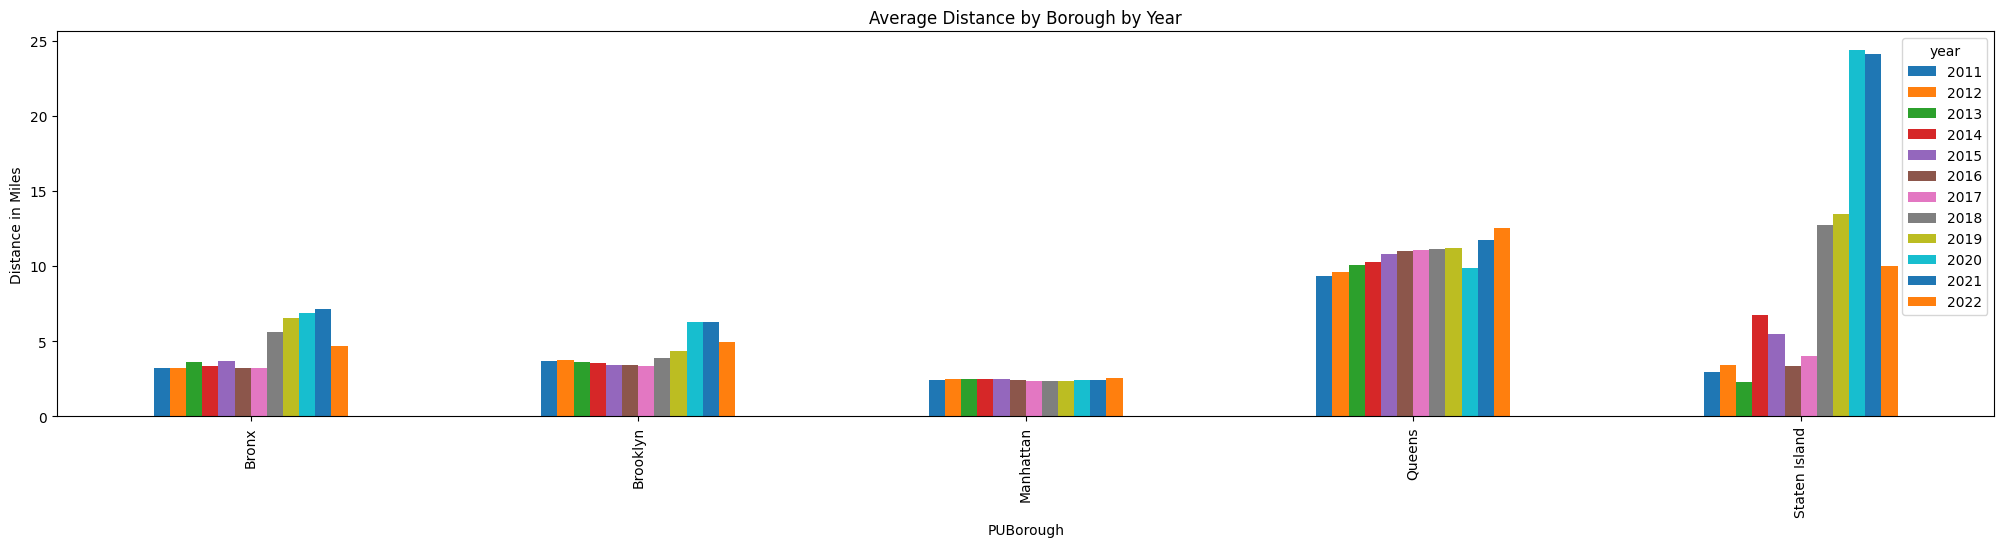

In [35]:

borough_distance = overall_data.groupby(['PUBorough', 'year'])['trip_distance'].mean()
borough_distance = borough_distance.reset_index()
borough_distance = borough_distance.pivot(index='PUBorough', columns='year', values='trip_distance')
borough_distance.plot(kind='bar', title='Average Distance by Borough by Year', ylabel='Distance in Miles')

plt.gcf().set_size_inches(25, 5)



### Findings

* The average trip distance was surprisingly on the incline in most Borough's from 2019 on.
* The Bronx had it's highest yearly average trip distance in 2021 and Staten Island's was in 2020.
* There wasn't a single Borough whose trip distance fill during the pandemic related years of 2020-2021.

#### Question 5: Was tipping affected by the pandemic?

In [36]:

borough_tip = overall_data[overall_data['PUBorough'] != 'EWR']
borough_tip = overall_data.groupby(['PUBorough'])['tip_amount'].mean()
borough_tip

PUBorough
Bronx            1.073483
Brooklyn         1.657975
Manhattan        1.581860
Queens           4.517931
Staten Island    2.020513
Name: tip_amount, dtype: float64

In [37]:

borough_tip_2020 = overall_data[overall_data['year'] == 2020]
borough_tip_2020 = borough_tip_2020.groupby(['PUBorough'])['tip_amount'].mean()
borough_tip_2020


PUBorough
Bronx            1.390558
Brooklyn         1.704921
Manhattan        1.806556
Queens           3.649751
Staten Island    1.841483
Name: tip_amount, dtype: float64

In [38]:

borough_tip_2019 = overall_data[overall_data['year'] == 2019]
borough_tip_2019 = borough_tip_2019.groupby(['PUBorough'])['tip_amount'].mean()
borough_tip_2019

PUBorough
Bronx            0.366163
Brooklyn         1.526603
Manhattan        1.972319
Queens           5.120127
Staten Island    1.777083
Name: tip_amount, dtype: float64

In [39]:

borough_tip_2021 = overall_data[overall_data['year'] == 2021]
borough_tip_2021 = borough_tip_2021.groupby(['PUBorough'])['tip_amount'].mean()
borough_tip_2021

PUBorough
Bronx            0.686697
Brooklyn         1.614957
Manhattan        2.084789
Queens           5.165967
Staten Island    2.107375
Name: tip_amount, dtype: float64

In [40]:

borough_tip_2022 = overall_data[overall_data['year'] == 2022]
borough_tip_2022 = borough_tip_2022.groupby(['PUBorough'])['tip_amount'].mean()
borough_tip_2022

PUBorough
Bronx            0.930800
Brooklyn         3.067730
Manhattan        2.338994
Queens           6.306821
Staten Island    1.187692
Name: tip_amount, dtype: float64

In [41]:

borough_tip_queens = overall_data[overall_data['PUBorough'] == 'Queens']
borough_tip_queens = borough_tip_queens.groupby(['PUBorough'])['tip_amount'].mean()
borough_tip_queens


PUBorough
Queens    4.517931
Name: tip_amount, dtype: float64

In [42]:

tip_change = (borough_tip_2020 - borough_tip_2019) / borough_tip_2019
tip_change = tip_change * 100
tip_change

tot_change = 0

for i in tip_change:
    tot_change += i

tot_change = tot_change / 5
print(f"{tot_change:.2f}% average change in tip")


51.59% average change in tip


##### Plot 9: Average Tip Amount by Borough

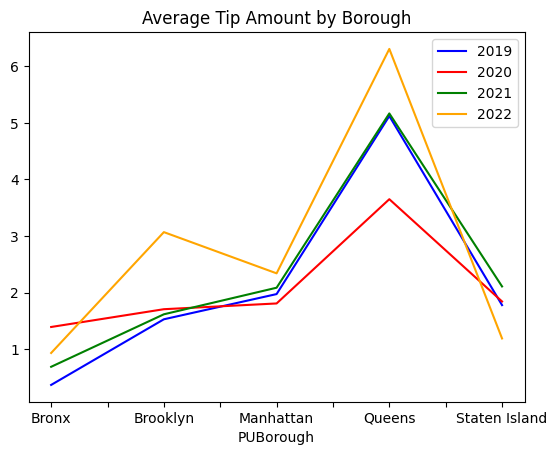

In [43]:

fig, ax = plt.subplots()
borough_tip_2019.plot(title='Average Tip Amount by Borough', color='blue', ax=ax)
borough_tip_2020.plot(title='Average Tip Amount by Borough', color='red', ax=ax)
borough_tip_2021.plot(title='Average Tip Amount by Borough', color='green', ax=ax)
borough_tip_2022.plot(title='Average Tip Amount by Borough', color='orange', ax=ax)
ax.legend(['2019', '2020', '2021', '2022'])


### Findings

* Queens consistently has the highest average tip of all the Boroughs at $4.52.
* Tipping had a 51.59% change from 2019 to 2020. The only Boroughs that saw a rise in tipping in 2020 was the Bronx and Staten Island.
* Tipping did return to roughly pre-Covid levels in 2021 for all Boroughs.
* There was a steep rise in tipping in all Boroughs in 2022 from 2021 except in the Bronx and Staten Island.

#### Notes for further study of this question:

It would be very interesting to dive into the reasons behind the inverse affect Covid-19 had on the Bronx and Staten Island when it comes to tipping. While these reasons are beyond the scope of this project, one could use this data to seek greater insight in this area.


##### Plot 10: Summary plot of all data presented

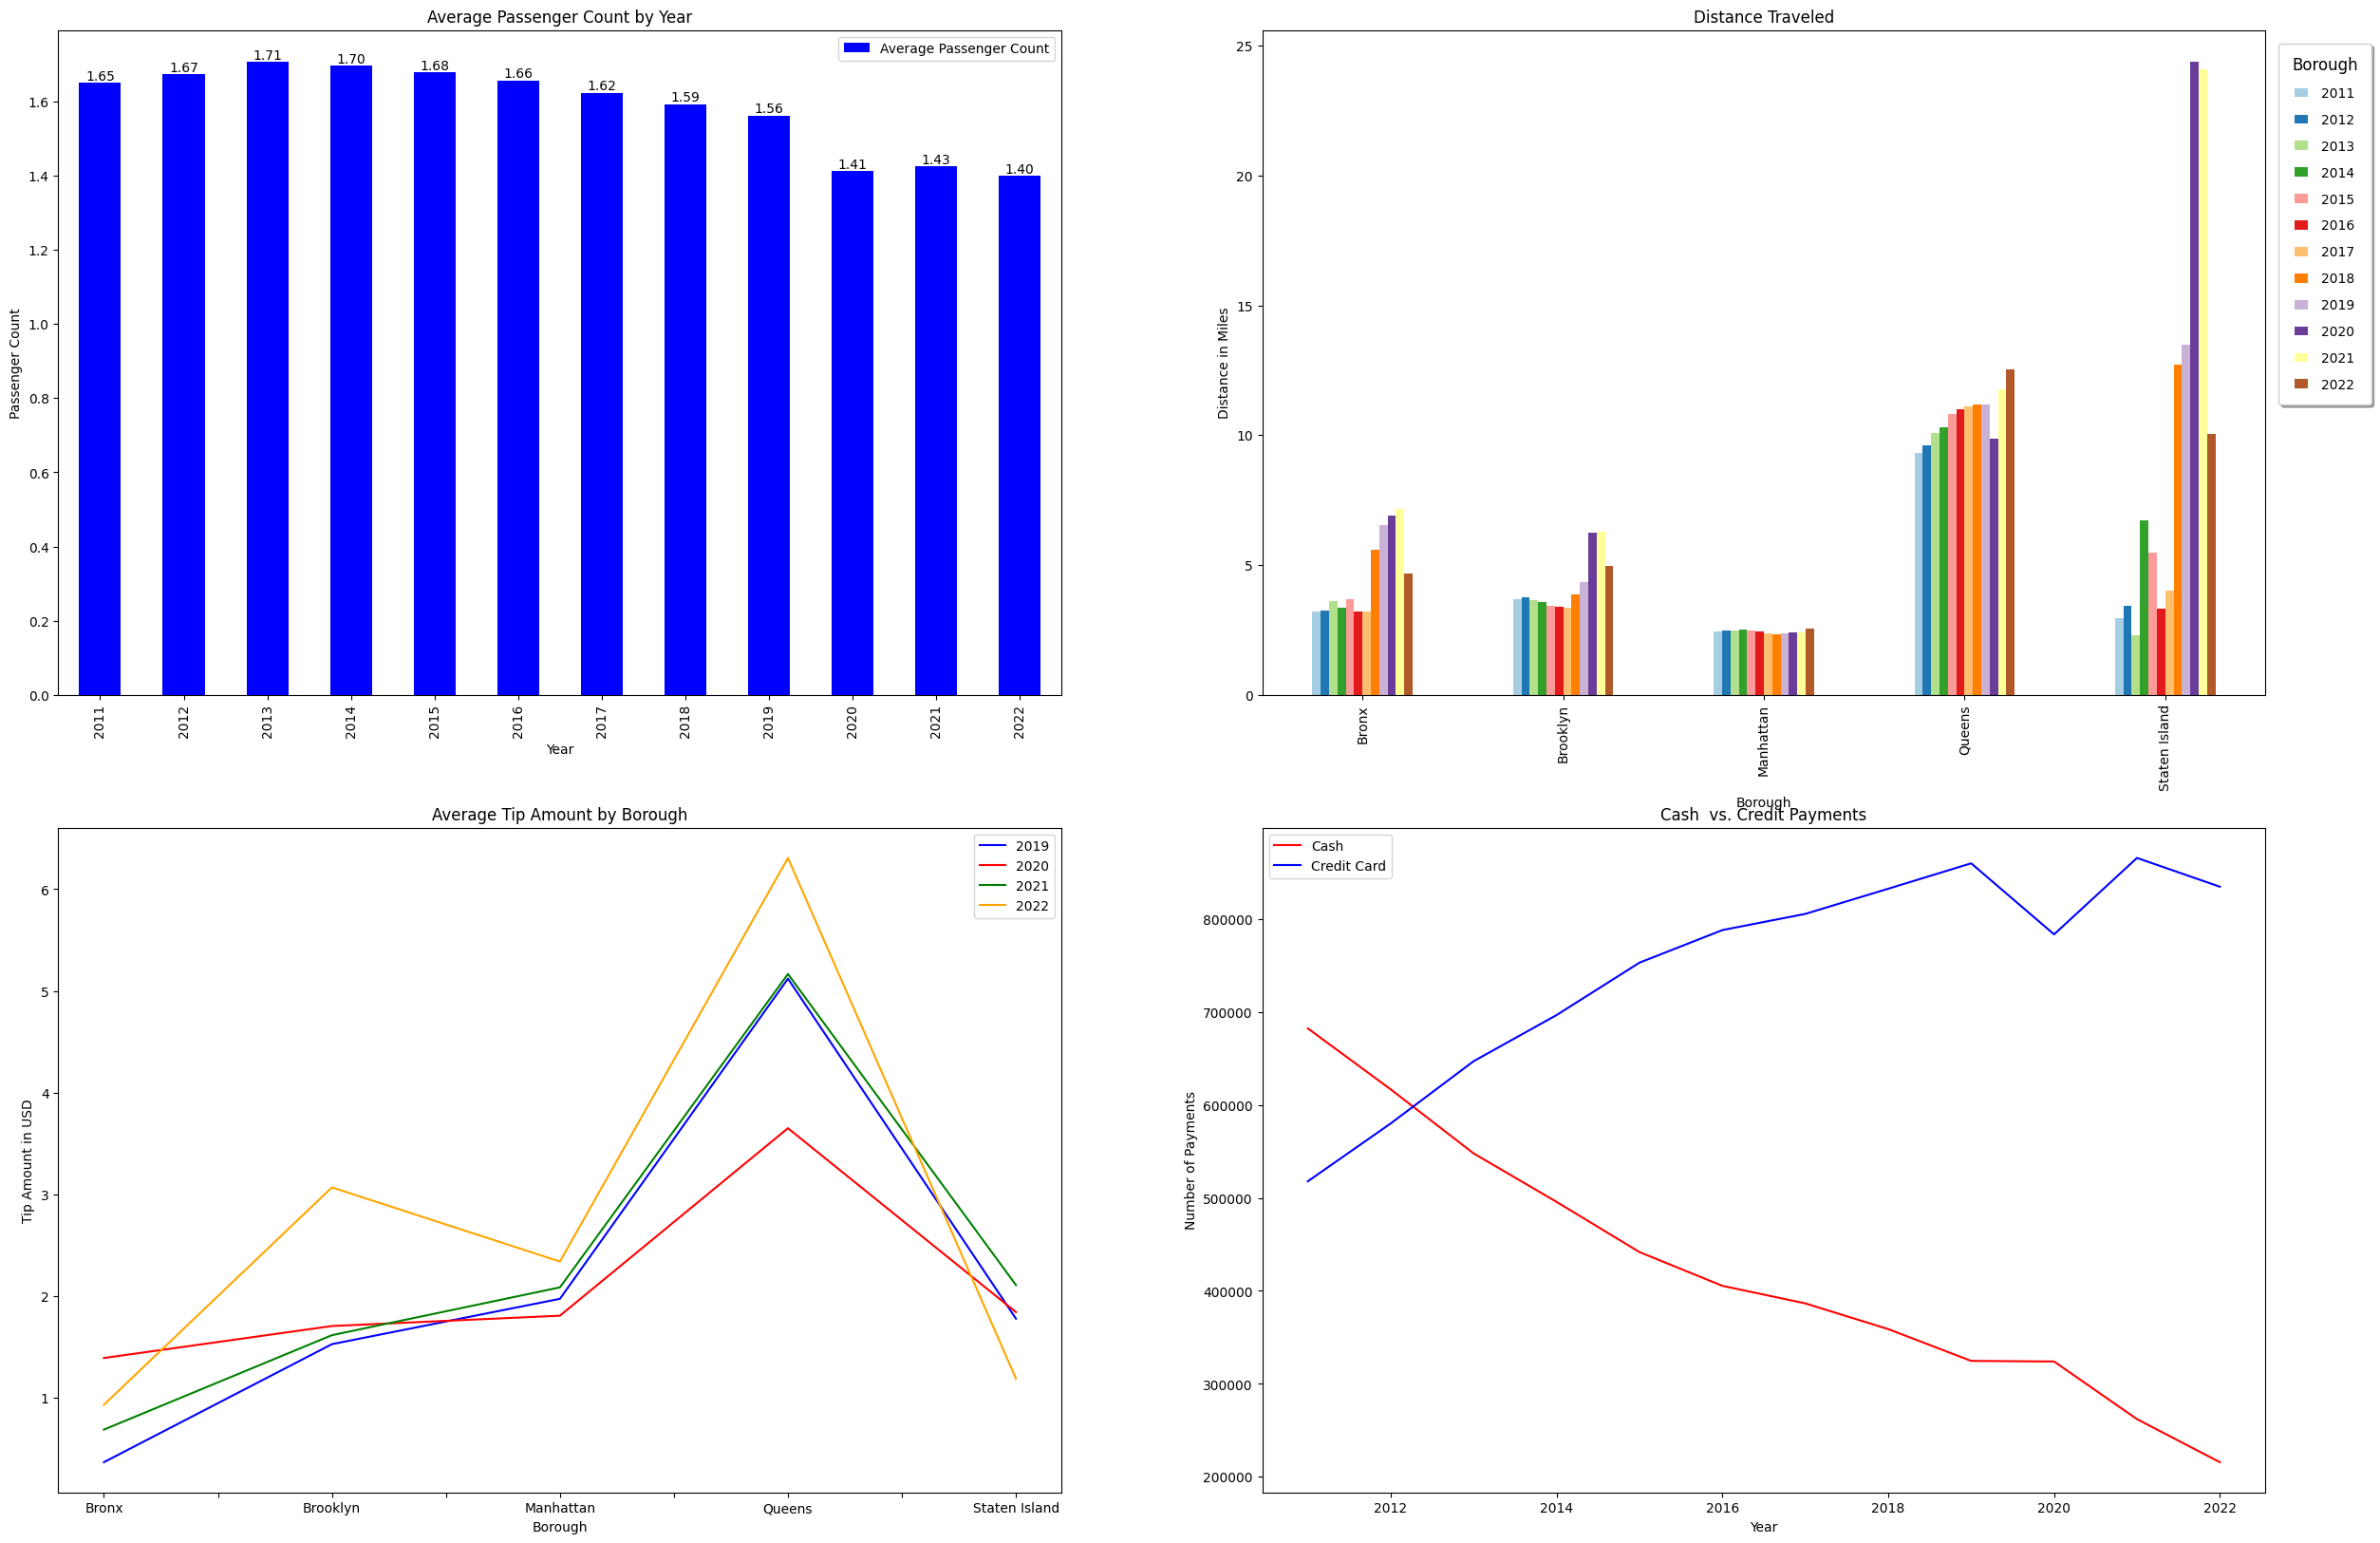

In [44]:


fig, ax = plt.subplots(2, 2, figsize=(30, 20))
passenger_count.plot(kind='bar', title='Average Passenger Count by Year', color='blue', ax=ax[0,0], xlabel='Year', ylabel='Passenger Count')
borough_distance.plot(kind='bar', title='Distance Traveled', colormap='Paired', ax=ax[0,1], xlabel='Borough', ylabel='Distance in Miles')
borough_tip_2019.plot(title='Average Tip Amount by Borough', color='blue', ax=ax[1,0], xlabel='Borough', ylabel='Tip Amount in USD')
borough_tip_2020.plot(title='Average Tip Amount by Borough', color='red', ax=ax[1,0], xlabel='Borough', ylabel='Tip Amount in USD')
borough_tip_2021.plot(title='Average Tip Amount by Borough', color='green', ax=ax[1,0], xlabel='Borough', ylabel='Tip Amount in USD')
borough_tip_2022.plot(title='Average Tip Amount by Borough', color='orange', ax=ax[1,0], xlabel='Borough', ylabel='Tip Amount in USD')
cash.plot(title='Cash  vs. Credit Payments', color='red', ax=ax[1,1], ylabel='Number of Payments', xlabel='Year')
credit.plot(title='Cash  vs. Credit Payments', color='blue', ax=ax[1,1], ylabel='Number of Payments', xlabel='Year')
ax[0,0].legend(['Average Passenger Count'])
ax[0,1].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fancybox=True, shadow=True, title='Borough', title_fontsize='large',    borderpad=1, labelspacing=1, handlelength=1, handletextpad=1, borderaxespad=1, columnspacing=1)
ax[1,0].legend(['2019', '2020', '2021', '2022'])
ax[1,1].legend(['Cash', 'Credit Card'])



for container in ax[0,0].containers:
    ax[0,0].bar_label(container, label_type='edge', fmt='%.2f')


# Conclusions

Through this study we have found:


* Average passenger count was already declining before the Covid-19 pandemic but dropped to its lowest point in 2020.
* Cash payments were more stable during the Covid-19 pandemic, dropping by only 139 transactions from 2019 to 2020, while Credit Cards had 74,101 less transactions in 2020 than in 2019 (*According to our sample size).
* In 2019, roughly 73% of all payments were made with credit card. In 2020 that number decreased to roughly %71.
* The average fare price dropped from $13.38 to $12.62 from 2019 to 2020.
* Queens consistently has the highest average tip of all the Boroughs at $4.52 (average since 2011).
* Tipping had a 51.59% change from 2019 to 2020. The only Boroughs that saw a rise in tipping in 2020 was the Bronx and Staten Island.
* Tipping did return to roughly pre-Covid levels in 2021 for all Boroughs.
* There was a steep rise in tipping in all Boroughs in 2022 from 2021 except in the Bronx and Staten Island.

This data shows that the Taxi industry in NYC was impacted in many ways by the Covid-19 pandemic.

# Suggestions for Further Study:

The  effect to the Bronx and Staten Island was opposite from what was expected. Researching why this was the case could yield some interesting results.

Number of trips per year was not examined here but a focus was put on the passengers and distances of the trips. 

This data only reflects a subset of 100,000 NYC Yellow taxi trips per year. The study could be expanded to include all taxi types in NYC and more data from each year. 